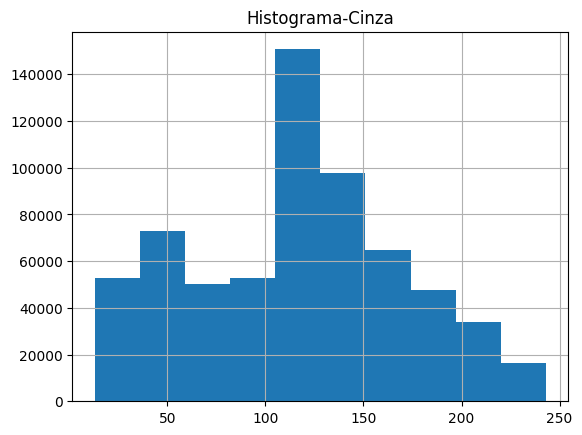

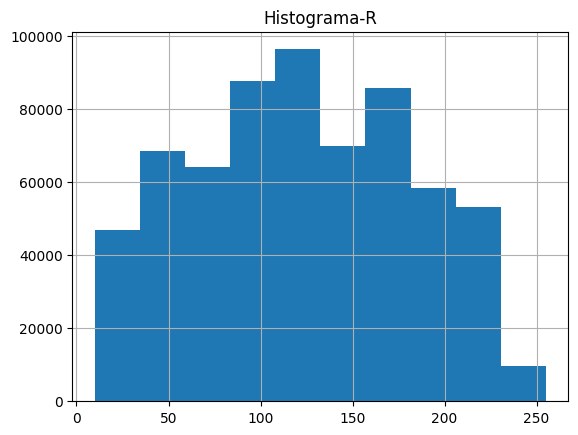

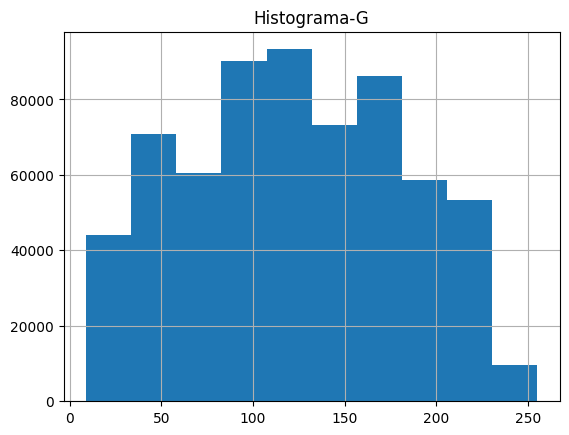

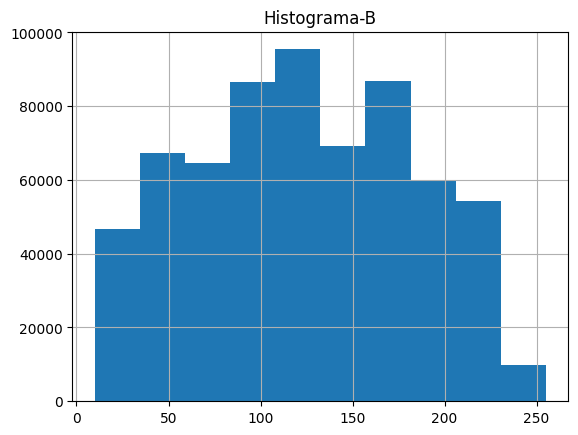

In [9]:
import pandas as pd

def histogramaCinza(cria=True):
    if cria:
        oImagem = open('EntradaEscalaCinza.pgm', 'r')
        aPixels = oImagem.readlines()

        oCsvHistograma = open('histograma-cinza.csv', 'a')
        oCsvHistograma.write(aPixels[3])
        iIndice = 4
        while iIndice < len(aPixels):
            oCsvHistograma.write(str(", "+aPixels[iIndice]))
            iIndice = iIndice + 1
        oImagem.close()
        oCsvHistograma.close()

    aDataPixels = pd.read_csv('histograma-cinza.csv')
    aDataPixels.rename(columns={'110':'Histograma-Cinza'}, inplace=True)
    aDataPixels.hist()

def histogramaRgb(cria=True):
    if cria:
        oImagem   = open('EntradaRGB.ppm', 'r')
        aLinhas   = oImagem.readlines()
        oCsvHistR = open('histograma-rgb-R.csv', 'a')
        oCsvHistG = open('histograma-rgb-G.csv', 'a')
        oCsvHistB = open('histograma-rgb-B.csv', 'a')
        aHistogramas = [oCsvHistR, oCsvHistG, oCsvHistB]
        iIndice    = 3
        iCsv       = 0
        bPrimeiroR = True
        bPrimeiroG = True 
        bPrimeiroB = True 
        while iIndice < len(aLinhas):
            aPixels = aLinhas[iIndice].split(' ')
            for i in range(len(aPixels)):
                if aPixels[i] != '\n':
                    if bPrimeiroR and iCsv == 0:
                        aHistogramas[iCsv].write(aPixels[i]+"\n")
                        bPrimeiroR = False
                    elif bPrimeiroG and iCsv == 1:
                        aHistogramas[iCsv].write(aPixels[i]+"\n")
                        bPrimeiroG = False
                    elif bPrimeiroB and iCsv == 2:
                        aHistogramas[iCsv].write(aPixels[i]+"\n")
                        bPrimeiroB = False
                    else:
                        aHistogramas[iCsv].write(","+aPixels[i]+"\n")
                if iCsv == 2:
                    iCsv = -1
                iCsv = iCsv + 1
            iIndice = iIndice + 1
        oImagem.close()
        oCsvHistR.close()
        oCsvHistG.close()
        oCsvHistB.close()

    aDataPixelsR = pd.read_csv('histograma-rgb-R.csv')
    aDataPixelsR.rename(columns={'84':'Histograma-R'}, inplace=True)
    aDataPixelsR['Histograma-R'] = pd.to_numeric(aDataPixelsR['Histograma-R'])
    aDataPixelsR.hist()

    aDataPixelsG = pd.read_csv('histograma-rgb-G.csv')
    aDataPixelsG.rename(columns={'111':'Histograma-G'}, inplace=True)
    aDataPixelsG['Histograma-G'] = pd.to_numeric(aDataPixelsG['Histograma-G'])
    aDataPixelsG.hist()

    aDataPixelsB = pd.read_csv('histograma-rgb-B.csv')
    aDataPixelsB.rename(columns={'166':'Histograma-B'}, inplace=True)
    aDataPixelsB['Histograma-B'] = pd.to_numeric(aDataPixelsB['Histograma-B'])
    aDataPixelsB.hist()

histogramaCinza()
histogramaRgb()
